In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import numpy as np

from SES_setup import *
from utils import *
from style import *

SES_setup loaded globally


In [2]:
"""def displace(offset, a):
    return (offset*(a.dag()) - offset.conjugate()*a).expm()

def undisplaced_initial(init_sys, PARAMS):
    n1 = Occupation(PARAMS['w0_1'], PARAMS['T_1'])
    n2 = Occupation(PARAMS['w0_2'], PARAMS['T_2'])
    return tensor(init_sys, qt.enr_thermal_dm([PARAMS['N_1'], PARAMS['N_2']], PARAMS['exc'], 
                                              [n1, n2]))
def position_ops(PARAMS):
    atemp = enr_destroy([PARAMS['N_1'], PARAMS['N_2']], PARAMS['exc'])
    return [tensor(I_sys, (a + a.dag())*0.5) for a in atemp] # Should have a 0.5 in this

def displaced_initial(init_sys, PARAMS, silent=False, return_error=False):
    # Works for 
    offset_1 = 0.5*sqrt(pi*PARAMS['alpha_1']/(2*PARAMS['w0_1']))
    offset_2 = 0.5*sqrt(pi*PARAMS['alpha_2']/(2*PARAMS['w0_2']))
    atemp = enr_destroy([PARAMS['N_1'], PARAMS['N_2']], PARAMS['exc'])
    x = position_ops(PARAMS)
    
    r0 = undisplaced_initial(init_sys, PARAMS)
    disp = copy.deepcopy(r0)
    for offset, a_ in zip([offset_1, offset_2], atemp):
        d = tensor(I_sys, displace(offset, a_))
        disp =  d * disp * d.dag()
    error = 100*(abs((disp*x[0]).tr()- offset_1)/offset_1 + abs((disp*x[1]).tr()- offset_2)/offset_2)
    if not silent:
        print ("Error in displacement: {:0.8f}%".format(error))
        print ("Ratio of kBT to Omega: {:0.4f}".format(0.695*PARAMS['T_1']/PARAMS['w0_1']))
        if ((PARAMS['T_1'] != PARAMS['T_2']) or (PARAMS['w0_1'] != PARAMS['w0_2'])):
           print("Ratio of kBT to Omega (2): {:0.4f}".format(0.695*PARAMS['T_2']/PARAMS['w0_2']))
    if return_error:   
        return disp, error
    else:
        return disp

def get_converged_N(PARAMS, err_threshold=1e-2, max_N=10):
    for N in range(3,max_N+1):
        PARAMS.update({'N_1':N, 'N_2':N, 'exc':N})
        disp, err = displaced_initial(OO_proj, PARAMS, silent=False, return_error=True)
        if err<err_threshold:
            return N
    print("Error could only converge to {}".format(err))
    return max_N"""
        
# Development and test code for displaced initial states
PARAMS = PARAMS_setup(bias=0, w_2=100, 
                              V = 100., alpha=50.,
                              T_EM=0., T_ph=300., alpha_EM=1, shift=True,
                              num_cpus=4, N=10, Gamma=1, w_0=200,
                              silent=True, exc_diff=0)

#PARAMS['T_2'] = 300.
N1, N2, exc = PARAMS['N_1'], PARAMS['N_2'], PARAMS['exc']

atemp = enr_destroy([N1, N2], exc)

#assert (np.sum(sum(displace(0.1, atemp[0]) - (tensor(qt.displace(N1, 0.1), 
#                                                     qt.identity(N2)))))) ==0 # 

offset_1 = PARAMS['alpha_1']/PARAMS['w0_1']
offset_2 = PARAMS['alpha_2']/PARAMS['w0_2']
x_1 = tensor(I_sys, atemp[0] + atemp[0].dag())*0.5
x_2 = tensor(I_sys, atemp[1] + atemp[1].dag())*0.5

i0 = undisplaced_initial(OO_proj, PARAMS)
#assert ( i0.shape == d1.shape)

assert (abs(i0.tr()-1) < 1e-10) # trace of dm is 1
assert (abs((i0*x_1).tr()) < 1e-10) # initally not displaced
#assert (d1.dag()*d1 == (tensor(qt.identity(3), qt.identity(N1),qt.identity(N2)))) # operator same size
#assert (d2.dag()*d2 == (tensor(qt.identity(3), qt.identity(N1),qt.identity(N2))))


offset_1 = 0.5*sqrt(pi*PARAMS['alpha_1']/(2*PARAMS['w0_1']))
offset_2 = 0.5*sqrt(pi*PARAMS['alpha_2']/(2*PARAMS['w0_2']))
disp = displaced_initial(OO_proj, PARAMS, silent=False)
ops = make_expectation_operators(PARAMS)
assert abs((disp*ops['OO']).tr() -1)<1e-10
x = position_ops(PARAMS)
print(offset_1,  [(disp*x_).tr() for x_ in x])

Error in displacement: 0.72603745%
Ratio of kBT to Omega: 1.0425
0.31332853432887503 [0.3122532521052312, 0.312128934037432]


In [3]:
N = get_converged_N(PARAMS, err_threshold=1, max_N=11, exc_diff_N=True)
print(N)

{'H_sub': Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[  0.   0.   0.]
 [  0. 100. 100.]
 [  0. 100. 100.]], 'coupling_ops': [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]], 'w_1': 100, 'w_2': 100, 'V': 100.0, 'bias': 0, 'w_xx': 200, 'T_1': 300.0, 'T_2': 300.0, 'w0_1': 200, 'w0_2': 200, 'T_EM': 0.0, 'alpha_EM': 1, 'mu': 1.0, 'num_cpus': 4, 'J': <function J_minimal at 0x10eb58a60>, 'dipole_1': 1.0, 'dipole_2': 1.0, 'Gamma_1': 1, 'Gamma_2': 1, 'parity_flip': False, 'alpha_1': 50.0, 'alpha_2': 50.0, 'N_1': 9, 'N_2': 9, 'exc': 18, 'sys_dim': 3}


# Displacements
Defining everything via the IBM hamiltonian and taking into account the normalisation of the displacement operator gives the right answers for this known test case. However, with RC mapping parameters and spectral densities taken from the [J. Chem. Phys paper](https://aip.scitation.org/doi/10.1063/1.4940218) and the Liouvillians defined in my code/notes, which agree with Redfield without any hacky prefactors, it appears like $\alpha_{ph}$ is missing a factor of 4 (or $\kappa$ is missing a factor of 2). This gives a factor of 2 error in the displacment of the modes. I think my approach now will be to include a factor of $1/2$ in the definition of the displacement, so that the re. I'll fully resolve this issue later on.

In [127]:
# Code for calculating decay rates from DS/BS to GS (manifold and total)

def rate_to_ground(init_rho, L):
    rho_dot = qt.vector_to_operator(L*qt.operator_to_vector(init_rho))
    return (ENR_ptrace(rho_dot, 0, PARAMS['exc'])*OO_proj).tr()

def rate_to_dark(init_rho, L, dark):
    rho_dot = qt.vector_to_operator(L*qt.operator_to_vector(init_rho))
    return (ENR_ptrace(rho_dot, 0, PARAMS['exc'])*dark).tr()

def exciton_to_ground(bias, V, Gamma, T_ph, w_2=1.1e4, alpha_EM=1., N=5):
    # Currently predicts a product state for the initial condition
    T_EM =0.
    eta = sqrt(bias**2 + 4*V**2)
    Omegas = [ 200.]
    couplings = np.linspace(0.1,50,30)
    data_names = ["{}".format(int(i)) for i in Omegas]
    in_in_dict = {'wc':[], 'nonadd':[], 'add': []}
    data_dict = {key: {'dtg': copy.deepcopy(in_in_dict), 
                       'btg': copy.deepcopy(in_in_dict)} for key in data_names}
    #                   'btd': copy.deepcopy(in_in_dict)} for key in data_names}
    i = 0
    for w_0 in Omegas:
        for alpha in couplings:
            #N=3
            PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                              silent=True, exc_diff=N)
            
            #PARAMS = get_converged_N(PARAMS, err_threshold=0.5, max_N=12, exc_diff_N=True) # Turn ENR off
            H, L, L_add, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0., shift_in_additive=False)
            H_wc, L_ns, L_s = get_H_and_L_wc(PARAMS['H_sub'], PARAMS, shift=False)
            #print_PARAMS(PARAMS)
            #ss = steadystate(H[1], [L_add])
            ops = make_expectation_operators(PARAMS)
            x = position_ops(PARAMS)
            energies, states = exciton_states(PARAMS, shift=False)
            dark, bright = states[0]*states[0].dag(), states[1]*states[1].dag()
            #init_test = 0.5*(XO_proj+OX_proj)
            r0 = displaced_initial(dark, PARAMS, silent=True) # Initial state is displaced
            assert abs(np.sum((dark - ENR_ptrace(r0, 0, PARAMS['exc'])).full())) <1e-6
            l = "{}".format(int(w_0))
            data_dict[l]['dtg']['nonadd'].append(rate_to_ground(r0, L))
            data_dict[l]['dtg']['add'].append(rate_to_ground(r0, L_add))
            data_dict[l]['dtg']['wc'].append(rate_to_ground(dark, L_ns))
            
            r0 = displaced_initial(bright, PARAMS, silent=True) # Initial state is displaced
            data_dict[l]['btg']['nonadd'].append(rate_to_ground(r0, L))
            data_dict[l]['btg']['add'].append(rate_to_ground(r0, L_add))
            data_dict[l]['btg']['wc'].append(rate_to_ground(bright, L_ns))
            # rate from bright to dark
            #data_dict[l]['btd']['nonadd'].append(rate_to_dark(r0, L, dark))
            #data_dict[l]['btd']['add'].append(rate_to_dark(r0, L_add, dark))
            #data_dict[l]['btd']['wc'].append(rate_to_dark(bright, L_ns, dark))
            i+=1
            if i%10 == 0:
                print (i)
    print("Calculation complete")
    return data_dict

In [9]:
data_dict_77 = exciton_to_ground(150, 150., 150., 77, N=7)
data_dict_300 = exciton_to_ground(150, 150., 150., 300, N=7)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculation complete
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculation complete


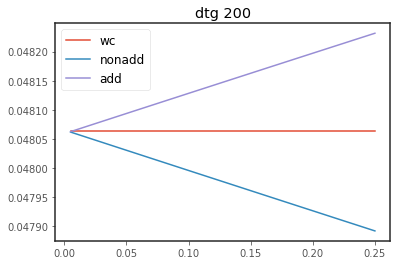

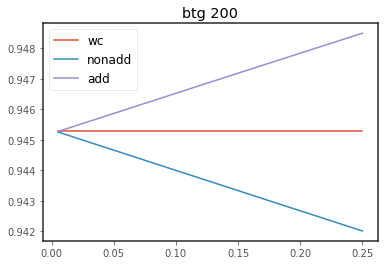

In [8]:
couplings = np.linspace(1.,50,30)
def plot_decay_rates(data_dict):
    for w0, dat in data_dict.items(): # for each w0, unpack data which is dictionary with keys [btd, dtg, btg]
        # for each set of rates, plot a new figure
        
        
        displacements = [c/int(w0) for c in couplings] 
        for rate_type, rate_data in dat.items(): # for each set of rates, plot each
            plt.figure()
            plt.title(rate_type +' '+ w0)
            for label, data_set in rate_data.items():
                if (rate_type != 'btd') and (label == 'wc'):
                    data_set = np.array(data_set)
                plt.plot(displacements, data_set, label=label)
            plt.legend()
plot_decay_rates(data_dict_300)

In [102]:
len(data_dict['150']['dtg']['wc'])

4

Here we can see a few things immediately about the RC model. 

- $\alpha$ does not control the rate between bright and dark states, this is done totally through $\Gamma$ since $\gamma = \Gamma/2\pi\Omega$. This means that the immediate BS$\to$DS rate is zero for this product state. 
- The additive electronic decay rates are independent of phonon-coupling strength, but steadystates seem to be dominated by phonon dissipation

# Vibronic level decay

Would like to look at:
- decay of vibronic states to ground
- decay of excited to ground vibronic states
- decay of bright vibronic states to dark manifold

In [23]:
def sort_eigs(evals, evecs):
    idx = evals.argsort()
    return evals[idx], evecs[idx]

def dark_bright_check(states):
    # ensures the states have the correct symmetry properties
    dark_states = states['dark']
    bright_states = states['bright']
    ground_states = states['ground']
    i = 0
    for g in ground_states:
        assert abs((g.dag()*g*OO_proj).tr()-1) <1e-12
    for d in dark_states:
        #print((d.dag()*d).tr())
        assert abs((d.dag()*d).tr()-1) <1e-12
        for b in bright_states:
            #print ((d.dag()*b))
            assert abs((d.dag()*b).tr()) <1e-12
            assert abs((d.dag()*d).tr()-1) <1e-12
            i += 1

            

def separate_states(H, PARAMS, trunc=0.8):
    # truncation removes the really dodgy states for which the parity is unclear 
    # (this might not be numerical error, but it probs is)
    ops = make_expectation_operators(PARAMS)
    energies, states = H.eigenstates()
    energies, states = sort_eigs(energies, states)
    energies, states = energies[0:int(len(states)*trunc)], states[0:int(len(states)*trunc)]
    parities = [(state*state.dag()*ops['sigma_x']).tr() for state in states]
    phonon_occ_dict = {'dark': [], 'bright': [], 'ground': []}
    states_dict = {'dark': [], 'bright': [], 'ground': []}
    energies_dict = {'dark': [], 'bright': [], 'ground': []} # for checking
    for i, parity in enumerate(parities):
        occ_1 = (states[i].dag()*ops['RC1_number']*states[i]).tr().real
        occ_2 = (states[i].dag()*ops['RC2_number']*states[i]).tr().real
        if abs(parity)<1e-10:
            states_dict['ground'].append(states[i])
            energies_dict['ground'].append(energies[i])
            phonon_occ_dict['ground'].append((occ_1, occ_2))
        if parity>0.0:
            states_dict['bright'].append(states[i])
            energies_dict['bright'].append(energies[i])
            phonon_occ_dict['bright'].append((occ_1, occ_2))
        if parity<0.0:
            states_dict['dark'].append(states[i])
            energies_dict['dark'].append(energies[i])
            phonon_occ_dict['dark'].append((occ_1, occ_2))
    if len(states_dict['ground'])  == len(states):
        print("This will not work for V=0.")
    #print(len(states_dict['dark']), len(states_dict['bright']), len(states_dict['ground']))
    #assert (len(states_dict['dark']) == len(states_dict['bright']))
    dark_bright_check(states_dict)
    return energies_dict, states_dict, phonon_occ_dict

In [3]:
# Code for calculating decay rates from DS/BS to GS (manifold and total)

def rate_to_state(init_rho, final_rho, L):
    rho_dot = qt.vector_to_operator(L*qt.operator_to_vector(init_rho))
    return (rho_dot*final_rho).tr()

def rate_to_manifold(init_rho, L, PARAMS, ops, manifold='OO'):
    energies, states = exciton_states(PARAMS)
    rho_dot = qt.vector_to_operator(L*qt.operator_to_vector(init_rho))
    return (rho_dot*ops[manifold]).tr()

def dark_to_ground_manifold(bias, V, Gamma, T_ph, w_2=1.1e4, alpha_EM=1., N=5):
    # Currently predicts a product state for the initial condition
    T_EM =0.
    eta = sqrt(bias**2 + 4*V**2)
    Omegas = [ 200.]
    couplings = np.linspace(0.1,50,60)
    data_names = ["{}".format(int(i)) for i in Omegas]
    in_in_dict = {'nonadd':[], 'add': []}
    state_indexes = [0,1,2,3,4,5,6,7]
    data_dict = {'d00-g': copy.deepcopy(in_in_dict), 
               'd01-g': copy.deepcopy(in_in_dict),
               'd10-g': copy.deepcopy(in_in_dict),
               'd11-g': copy.deepcopy(in_in_dict),
                'd02-g': copy.deepcopy(in_in_dict),
                'd20-g': copy.deepcopy(in_in_dict),
                'd21-g': copy.deepcopy(in_in_dict),
                'd22-g': copy.deepcopy(in_in_dict)}
    #                   'btd': copy.deepcopy(in_in_dict)} for key in data_names}
    i = 0
    for w_0 in Omegas:
        for alpha in couplings:
            #N=3
            PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                              silent=True, exc_diff=0)
            #PARAMS = get_converged_N(PARAMS, err_threshold=0.5, max_N=12, exc_diff_N=True) # Turn ENR off
            H, L, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0., shift_in_additive=False)
            energies_dict, states_dict, phonon_occ_dict = separate_states(H[1], PARAMS, trunc=0.8)
            ops = make_expectation_operators(PARAMS)
            for idx, state_label in zip(state_indexes ,data_dict.keys()):
                si = states_dict['dark'][idx]
                ri = si*si.dag()
                data_dict[state_label]['nonadd'].append(rate_to_manifold(ri, L['nonadd'], 
                                                                         PARAMS, ops, manifold='OO'))
                data_dict[state_label]['add'].append(rate_to_manifold(ri, L['add'], 
                                                                         PARAMS, ops, manifold='OO'))
            i+=1
            if i%10 == 0:
                print (i)
    print("Calculation complete")
    return data_dict, couplings



w_2 = 1.4 * ev_to_inv_cm
bias = 10e-3 * ev_to_inv_cm
V = 10e-3 * ev_to_inv_cm
alpha = 1e-3 * ev_to_inv_cm
T_EM = 0.
T_ph = 150
alpha_EM = 1e-2*inv_ps_to_inv_cm
eta = gap(bias, V)
w0 = 1.2*eta# 18e-3*ev_to_inv_cm
Gamma = 2*w0
print (eta, w0, V/eta)

dtg_manifold_rates = dark_to_ground_manifold(bias, V, Gamma, T_ph, w_2=1.1e4, alpha_EM=1., N=8)

SyntaxError: invalid syntax (<ipython-input-3-4b32688efc44>, line 45)

In [ ]:
def dark_to_ground_states(bias, V, Gamma, T_ph, w_2=1.1e4, alpha_EM=1., N=5):
    # Currently predicts a product state for the initial condition
    T_EM =0.
    eta = sqrt(bias**2 + 4*V**2)
    Omegas = [ 200.]
    couplings = np.linspace(0.1,50,60)
    data_names = ["{}".format(int(i)) for i in Omegas]
    in_in_dict = {'nonadd':[], 'add': []}
    state_indexes = [(0,0), (0,1), (0,2), (0,3), (1,0), (2,0), (3,0)]
    data_dict = {'d0-g0': copy.deepcopy(in_in_dict), 
               'd0-g10': copy.deepcopy(in_in_dict),
               'd0-g01': copy.deepcopy(in_in_dict),
               'd0-g11': copy.deepcopy(in_in_dict),
                'd01-g0': copy.deepcopy(in_in_dict),
                'd10-g0': copy.deepcopy(in_in_dict),
                'd11-g0': copy.deepcopy(in_in_dict)}
    #                   'btd': copy.deepcopy(in_in_dict)} for key in data_names}
    i = 0
    for w_0 in Omegas:
        for alpha in couplings:
            #N=3
            PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                              silent=True, exc_diff=0)
            #PARAMS = get_converged_N(PARAMS, err_threshold=0.5, max_N=12, exc_diff_N=True) # Turn ENR off
            H, L, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0., shift_in_additive=False)
            energies_dict, states_dict = separate_states(H[1], PARAMS, trunc=0.8)
            ops = make_expectation_operators(PARAMS)
            for idxs, state_label in zip(state_indexes ,data_dict.keys()):
                ri = states_dict['dark'][idxs[0]]
                rf = states_dict['ground'][idxs[1]]
                data_dict[state_label]['nonadd'].append(rate_general(ri*ri.dag(), rf*rf.dag(), L['nonadd']))
                data_dict[state_label]['add'].append(rate_general(ri*ri.dag(), rf*rf.dag(), L['add']))
            i+=1
            if i%10 == 0:
                print (i)
    print("Calculation complete")
    return data_dict, couplings

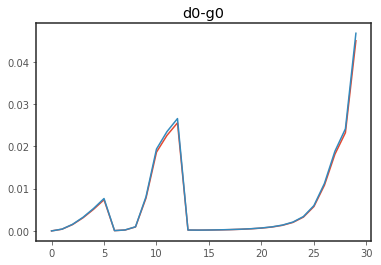

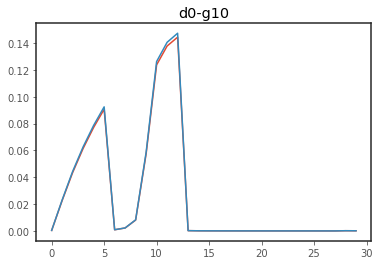

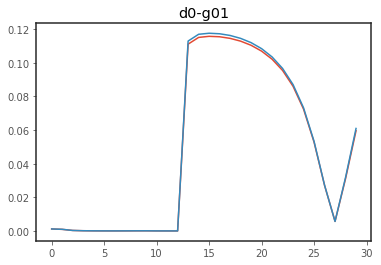

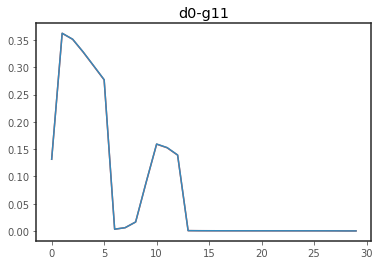

In [7]:
def plot_dtg_manifold_rates(data_dict):
    for title, data in data_dict.items():
        plt.figure()
        plt.title(title)
        plt.plot(data['nonadd']) 
        plt.plot(data['add'])
        
plot_dtg_manifold_rates(dtg_manifold_rates)

In [50]:
w_2 = 1.4 * ev_to_inv_cm
bias = 0 #10e-3 * ev_to_inv_cm
V = 82.25228377376521 # 1e-3 * ev_to_inv_cm
alpha = 1e-3 * ev_to_inv_cm
T_EM = 0.
T_ph = 150
alpha_EM = 1e-2*inv_ps_to_inv_cm
eta = gap(bias, V)
w0 = 1.2*eta# 18e-3*ev_to_inv_cm
Gamma = 2*w0
print (eta, w0, V/eta, Occupation(w0, T_ph))

N=7
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w0,
                              silent=True, exc_diff=0)
            
#PARAMS = get_converged_N(PARAMS, err_threshold=0.5, max_N=12, exc_diff_N=True) # Turn ENR off
H, L, PARAMS = get_H_and_L(PARAMS, silent=True, threshold=0.)
ops = make_expectation_operators(PARAMS)

164.50456754753043 197.4054810570365 0.5 0.17720776475018865


In [48]:
energies, states, occs = separate_states(H[1], PARAMS, trunc=0.9)

In [49]:
occs

{'dark': [(0.02100462717316022, 0.021004627173160196),
  (0.5210046249459234, 0.5210046249458645),
  (0.36089317839160523, 0.360893178391673),
  (1.0210043921781917, 1.0210043921783687),
  (0.860892825253464, 0.8608928252533475),
  (0.824567034352385, 0.8245670343522441),
  (1.520993809199481, 1.5209938091993493),
  (1.36087263691391, 1.3608726369142212),
  (1.3245444091028378, 1.3245444091026402),
  (1.3056251965449939, 1.3056251965449936),
  (2.0207675590085517, 2.0207675590085983),
  (1.8605236526777258, 1.8605236526778375),
  (1.8239791630097606, 1.823979163010284),
  (1.8051782899507836, 1.805178289951104),
  (2.2594432795989996, 2.25944327959877),
  (2.51772317405972, 2.5177231740593315),
  (2.3600089605391696, 2.3600089605395658),
  (2.323884389166594, 2.323884389165909),
  (2.304910127889325, 2.3049101278903783),
  (2.292828908886766, 2.2928289088865323),
  (2.7576487387996687, 2.757648738798608),
  (2.9877913081386467, 2.987791308138118),
  (2.8606784973018446, 2.8606784973025

In [28]:
occs

{'dark': [(0.00030185662799921223, 0.12661274719119167),
  (0.14929025342147445, 0.03294788376662086),
  (0.5003121076074428, 0.6266014014445878),
  (0.6558717760758821, 0.5426380338081216),
  (0.6492614587668402, 0.5329687886966818),
  (1.0014185634589103, 1.1254473212806428),
  (1.1556090330916078, 1.0409423630172936),
  (1.1562741825500307, 1.0418713710912475),
  (1.1477642242971429, 1.0341960416357487),
  (1.5368689462138765, 1.5892251930682832),
  (1.5269605177423813, 1.658108542714433),
  (1.689566116415106, 1.5021625914802215),
  (1.735849109945718, 1.455524783029235),
  (1.6524560833062394, 1.5259771254749381),
  (2.2228347888533766, 1.9000581704678825),
  (1.8566296746524626, 2.315979036121622),
  (1.949190724935294, 2.231263846162967),
  (1.497872783829467, 2.673751630534167),
  (1.316654535738885, 2.844721142800131),
  (4.069157531016794, 0.062062687574923205),
  (3.0223176947543706, 2.094587263673971),
  (2.3256011447161344, 2.8351914182184617),
  (2.11381228540308, 3.05334